### Consider the Diabetes dataset . Assume the population prior probabilities are estimated using the relative frequencies of the classes in the data.

In [3]:
install.packages("heplots")
install.packages("candisc")
library(heplots)
library(candisc)
library(car)


The downloaded binary packages are in
	/var/folders/55/bmv00p010454k7lg69139c0w0000gn/T//RtmpiYDT14/downloaded_packages

The downloaded binary packages are in
	/var/folders/55/bmv00p010454k7lg69139c0w0000gn/T//RtmpiYDT14/downloaded_packages


Loading required package: car

Loading required package: carData

Loading required package: broom


Attaching package: ‘candisc’


The following object is masked from ‘package:stats’:

    cancor




In [1]:
load("Diabetes.Rdata")

In [2]:
DiabetesData = Diabetes
head(DiabetesData)

,relwt,glufast,glutest,instest,sspg,group
,<dbl>,<int>,<int>,<int>,<int>,<fct>
1,0.81,80,356,124,55,Normal
2,0.95,97,289,117,76,Normal
3,0.94,105,319,143,105,Normal
4,1.04,90,356,199,108,Normal
5,1.00,90,323,240,143,Normal
6,0.76,86,381,157,165,Normal


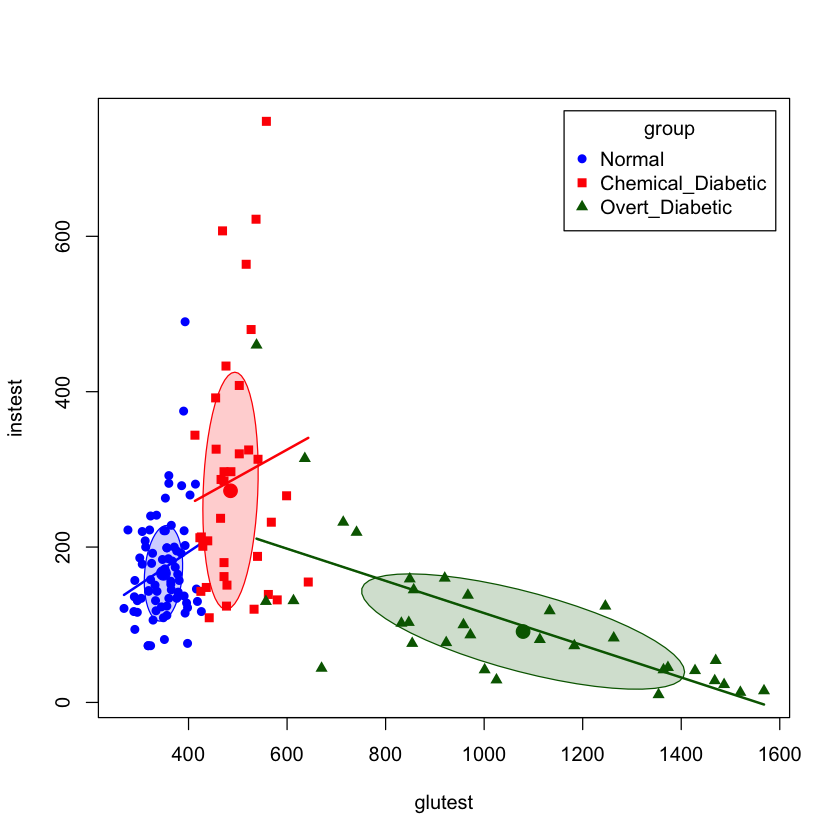

In [4]:
scatterplot( instest ~ glutest | group, data=DiabetesData, 
             pch=c(16,15,17), 
             col=c("blue", "red", "darkgreen"),
             smooth=FALSE, 
             grid=FALSE, 
             legend=list(coords="topright"), 
             lwd=2,
             ellipse=list(levels=0.5))

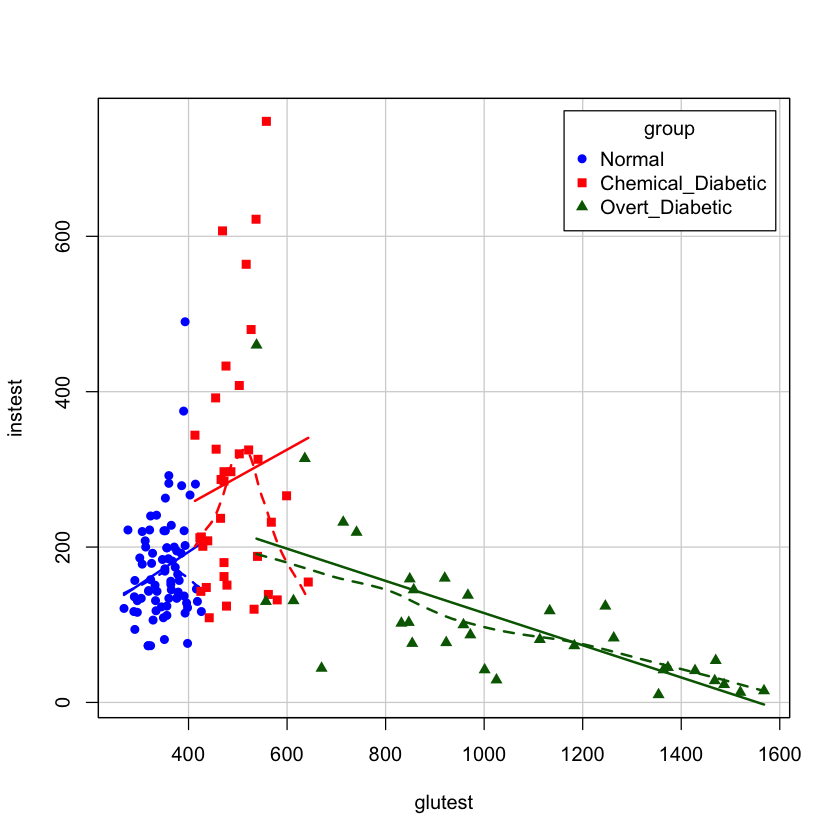

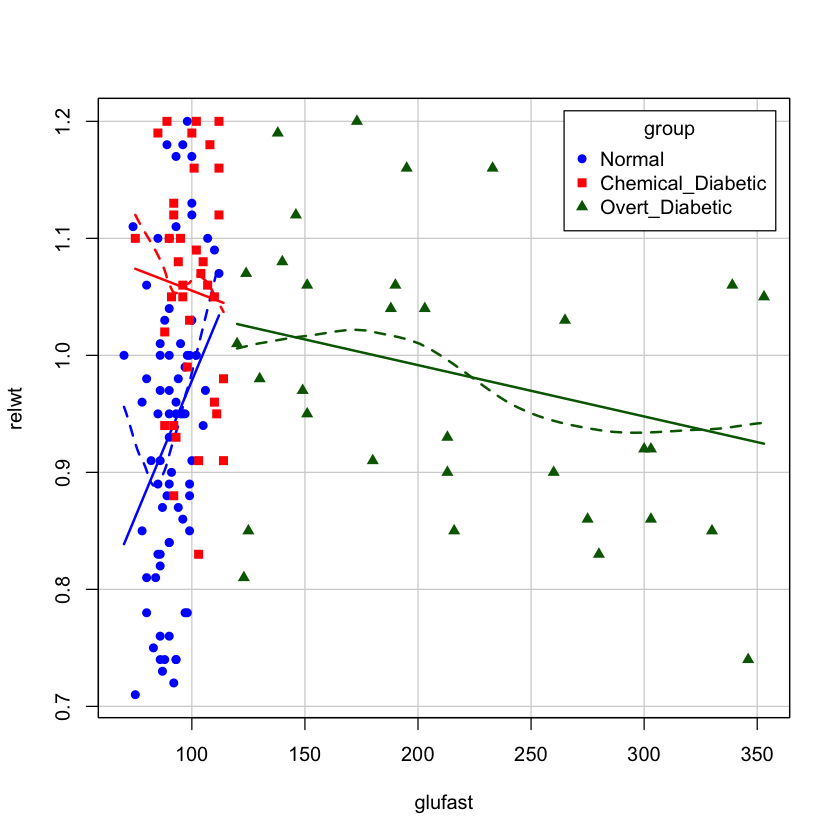

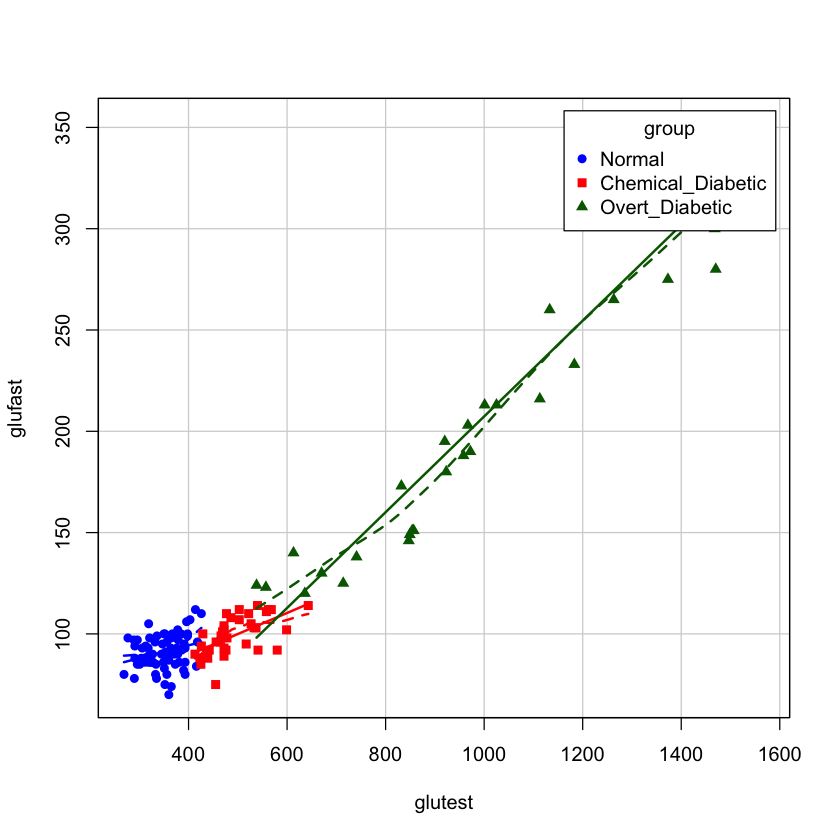

In [5]:
scatterplot( instest ~ glutest | group, data=DiabetesData, pch=c(16,15,17), col=c("blue", "red", "darkgreen"), legend=list(coords="topright"))
scatterplot( relwt ~ glufast | group, data=DiabetesData, pch=c(16,15,17), col=c("blue", "red", "darkgreen"), legend=list(coords="topright"))
scatterplot( glufast ~ glutest | group, data=DiabetesData, pch=c(16,15,17), col=c("blue", "red", "darkgreen"), legend=list(coords="topright"))

#### From the above scatter plots we can conclude that each class has different covariance matrices.

### Apply linear discriminant analysis (LDA) and quadratic discriminant analysis (QDA).

In [6]:
install.packages("klaR")
library(klaR)
library(MASS)


The downloaded binary packages are in
	/var/folders/55/bmv00p010454k7lg69139c0w0000gn/T//RtmpiYDT14/downloaded_packages


Loading required package: MASS



In [7]:
#splitting into test and training
set.seed(111)
indices = sample(1:nrow(DiabetesData), round(2/3*nrow(DiabetesData)), replace = FALSE )
trainD = DiabetesData[indices, ]
testD = DiabetesData[-indices, ]
dim(trainD)
dim(testD)

[1] 97  6

[1] 48  6

#### LDA Fit:

In [12]:
#LDA Fitting
lda.fit = lda(group ~ ., data = trainD)

test_pred <- predict(lda.fit, newdata = testD)

# data.frame(test_pred$group, test_pred$instest, test_pred$sspg)[1:5,]

train_pred <- predict(lda.fit, newdata = trainD)

# compute the error rates

train_error <- (1/length(trainD$group))*length(which(trainD$group != train_pred$class))
test_error <- (1/length(testD$group))*length(which(testD$group != test_pred$class))
paste("Train Error: ",train_error)
paste("Test Error: ",test_error )

[1] "Train Error:  0.123711340206186"

[1] "Test Error:  0.104166666666667"

#### QDA Fit:

In [10]:
qda.fit <- qda(group ~ ., data = trainD)

train_pred <- predict(qda.fit, newdata = trainD)
test_pred <- predict(qda.fit, newdata = testD)

y_hat_train <- train_pred$class
y_hat_test <- test_pred$class

y_true_train <- trainD$group
y_true_test <- testD$group

train_err <- (1/length(y_hat_train))*length(which(y_true_train != y_hat_train))
test_err <- (1/length(y_hat_test))*length(which(y_true_test != y_hat_test))

paste("Train Error: ",train_err)
paste("Test Error: ",test_err )

[1] "Train Error:  0.0515463917525773"

[1] "Test Error:  0.0208333333333333"

#### Apply RDA (regularized discriminant analysis). What is the optimal value of α in this case? Does this support your observations about the covariance matrices in (a)

APER 
0.1237113

[1] "The optimal value of alpha is: 0"    
[2] "The optimal value of alpha is: 0.025"

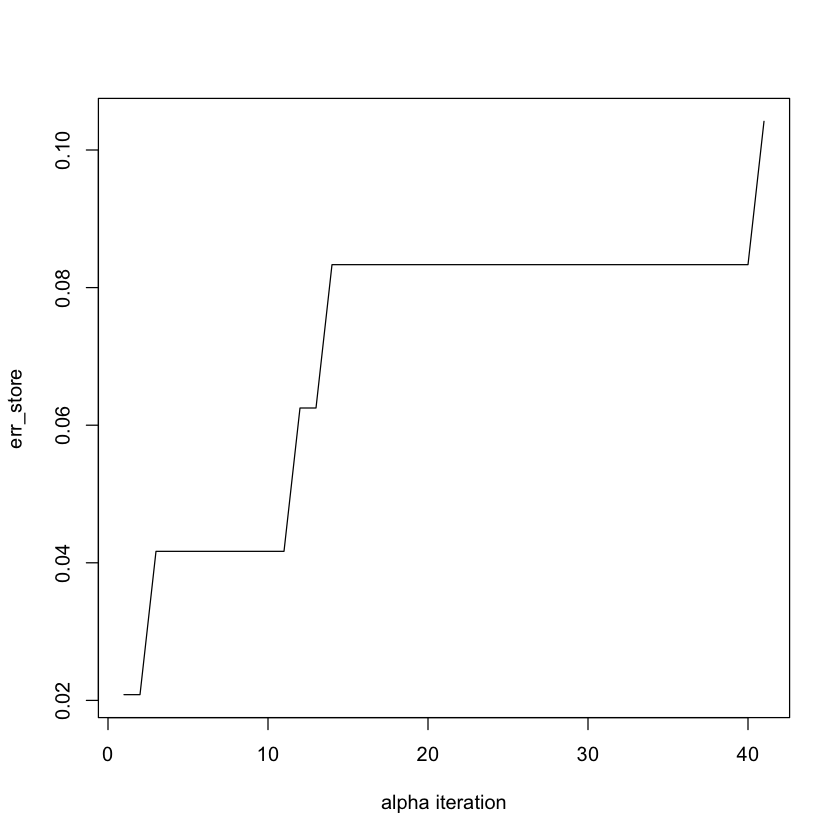

In [13]:
rda.fit <- rda(group ~ ., data = trainD, regularization = c(gamma=0, lambda=.5))

rda.fit$error.rate

test.pred <- predict(rda.fit, newdata = testD)

alpha = seq(from = 0, to = 1, by = .025)
err_store <- c()
for (i in 1:length(alpha)){
    rda.fit <- rda(group ~ ., data = trainD, regularization = c(gamma=0, lambda=alpha[i]))
    y_hat_test <- predict(rda.fit, newdata=testD)$class
    err <- (1/length(y_hat_test))*length(which(y_hat_test != testD$group))
    err_store <- c(err_store, err)
}


plot(err_store, type = "l", xlab = "alpha iteration")
optimal_alpha_index = which(err_store == min(err_store))
paste("The optimal value of alpha is:", alpha[optimal_alpha_index])

**From the above plot we can confirm that QDA is the better performer compared to RDA and LDA which can be inferred from the optimal alpha value.**

#### Suppose an individual has (glucose test/intolerence= 68, insulin test=122, SSPG = 544.Relative weight = 1.86, fasting plasma glucose = 184). To which class does LDA assignthis individual? To which class does QDA?

In [14]:
new <- data.frame(relwt =1.86,glufast= 184,glutest = 68,instest=122,sspg = 544)
result <- predict(lda.fit, newdata = new)
paste("The LDA classifies the patient as : ",result$class)
result <- predict(qda.fit, newdata = new)
paste("The QDA classifies the patient as : ",result$class)

[1] "The LDA classifies the patient as :  Normal"

[1] "The QDA classifies the patient as :  Overt_Diabetic"